# Assignment 1 - mkecera3@gatech.edu

## Import libraries

In [439]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import torch.nn.functional as F
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import preprocessing

## Load and save the datasets

Start of citation - the following code was addapted from https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [49]:
# transform = transforms.Compose([transforms.ToTensor(),
#                               transforms.Normalize((0.5,), (0.5,)),
#                               ])
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST('./data', download=False, train=True, transform=transform)
valset = datasets.MNIST('./data', download=False, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [50]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

## Neural network

### MNIST dataset

In [206]:
def nnPredict(model, valloader, criterion):
    correct_count, all_count = 0, 0
    running_loss = 0
    for images,labels in valloader:
        images = images.view(images.shape[0], -1)
        with torch.no_grad():
                output = model(images)
                loss = criterion(output, labels)
                running_loss += loss.item()
        
#         print(images.shape)
#         print(labels.shape)

        for i in range(len(labels)):
            img = images[i].view(1, 784)
#             print(img.shape)
            with torch.no_grad():
                logps = model(img)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

#     print("Number Of Images Tested =", all_count)
#     print("Model Accuracy =", (correct_count/all_count))
#     print("Testing Loss  =", (running_loss/len(valloader)))
    
    return running_loss/len(valloader), correct_count, all_count

In [104]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [105]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [207]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
lossData = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
    testingLoss, correctCount, allCount = nnPredict(model, valloader, criterion)
    print("Testing Loss  =", (testingLoss))
    
    lossData.append([e, running_loss/len(trainloader), 'Training Loss'])
    lossData.append([e, testingLoss, 'Testing Loss'])
    
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.05006870051581802
torch.Size([64, 784])
torch.Size([64])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

KeyboardInterrupt: 

In [109]:
lossData = pd.DataFrame.from_records(lossData, columns=["Epoch", "Loss", "Stage"])

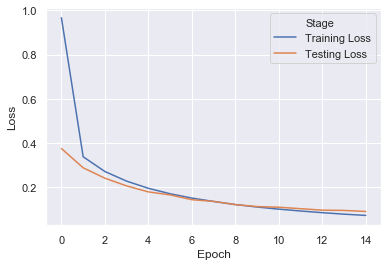

In [110]:
# vizualize train and test error across iterations
sns.set(style="darkgrid")

sns.lineplot(x="Epoch", y="Loss",
             hue="Stage",
             data=lossData)

In [73]:
runningLoss, correctCount, allCount = nnPredict(model, valloader, criterion)

Number Of Images Tested = 10000

Model Accuracy = 0.9746

Testing Loss  = 13.345386860892177


End of citation - the preceding code was addapted from https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

### Credit default dataset

In [452]:
# load dataset
creditDataDf = pd.read_excel('./data/default of credit card clients.xls', header=1)
creditDataDf = creditDataDf.drop(columns=['ID'])
creditDataDf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [453]:
# create dummy variables from categorical
creditDataDf = pd.get_dummies(creditDataDf, prefix=['SEX', 'EDUCATION', 'MARRIAGE'], columns=['SEX', 'EDUCATION', 'MARRIAGE'])

In [454]:
creditDataDf.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [455]:
# drop last mummy variable
creditDataDf = creditDataDf.drop(columns=['SEX_2', 'EDUCATION_6', 'MARRIAGE_3'])

In [456]:
creditDataDf.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_1', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2'],
      dtype='object')

In [457]:
y = creditDataDf['default payment next month']
creditDataDf = creditDataDf.drop(columns=['default payment next month'])

In [458]:
# normalize the data
x = creditDataDf.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
creditDataDf = pd.DataFrame(x_scaled, columns=creditDataDf.columns)
creditDataDf

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,1.234323,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,...,1.234323,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,...,1.234323,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,...,1.234323,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,...,1.234323,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.042465,1.093780,-1.066471


In [459]:
creditDataDf.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2'],
      dtype='object')

In [460]:
X_train, X_test, y_train, y_test = train_test_split(creditDataDf, y, test_size=0.2, random_state=37)
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2
480,0.635981,0.489762,0.014861,0.111736,0.138865,0.188746,-0.647565,1.992316,-0.085467,1.235334,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
4479,-0.905498,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.161613,-0.049936,...,1.234323,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
19225,0.250611,0.272789,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,0.253137,-0.684940,-0.688665,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
26843,1.483795,1.249166,-1.764843,-1.558876,-1.532192,-1.521944,-1.530046,-1.486041,-0.672147,-0.655858,...,1.234323,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,1.093780,-1.066471
20359,-1.136720,-1.462993,2.684416,1.782348,1.809921,1.899436,2.882360,1.992316,-0.476560,-0.458281,...,1.234323,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29109,-0.211833,2.008570,0.904712,2.617654,1.809921,1.899436,1.999879,1.992316,-0.451708,-0.446774,...,-0.810161,-0.021608,1.354326,-0.937295,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
988,1.483795,-1.137534,1.794564,1.782348,1.809921,1.899436,1.999879,1.992316,3.198341,3.393314,...,-0.810161,-0.021608,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
9036,-1.059646,1.032193,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.312874,-0.293415,...,1.234323,-0.021608,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.042465,-0.914261,0.937672
20843,2.871126,1.466139,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,0.441350,0.517769,...,1.234323,-0.021608,-0.738375,-0.937295,-0.442752,-0.064163,-0.097063,-0.042465,-0.914261,0.937672


In [461]:
y_train

480      0
4479     0
19225    0
26843    0
20359    1
        ..
29109    1
988      0
9036     0
20843    0
1935     0
Name: default payment next month, Length: 24000, dtype: int64

In [462]:
print(X_train.columns)
print(len(X_train.columns))

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2'],
      dtype='object')
30


In [463]:
sum(y_train)/len(y_train)

0.22145833333333334

In [464]:
# convert data to tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int))
y_test_tensor = torch.tensor(y_test.values.astype(np.int))

In [465]:
trainTorchDataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
valTorchDataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [466]:
len(valTorchDataset)

6000

In [467]:
trainloader2 = torch.utils.data.DataLoader(trainTorchDataset, batch_size=64, shuffle=True)
valloader2 = torch.utils.data.DataLoader(valTorchDataset, batch_size=len(valTorchDataset), shuffle=True)

In [468]:
def nnPredictTabular(model2, valloader2, criterion):
    correct_count, all_count = 0, 0
    running_loss = 0
    for rows,labels in valloader2:
        
#         print(rows.shape)
#         print(labels.shape)
        
        with torch.no_grad():
                output = model2(rows)
                loss = criterion(output, labels)
                running_loss += loss.item()


        for i in range(len(labels)):
            row = rows[i].view(1, 30)
#             print(row.shape)
            with torch.no_grad():
                logps = model2(row)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

#     print("Number Of Images Tested =", all_count)
#     print("Model Accuracy =", (correct_count/all_count))
#     print("Testing Loss  =", (running_loss/len(valloader2)))
    
    return running_loss/len(valloader2), correct_count, all_count

In [469]:
input_size = 30
hidden_sizes = [25, 15]
output_size = 2

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], output_size),
                       nn.LogSoftmax(dim=1))
print(model2)

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=2, bias=True)
  (5): LogSoftmax()
)


In [470]:
criterion = nn.NLLLoss()

In [471]:
optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
time0 = time()
epochs = 15
lossData = []
for e in range(epochs):
    running_loss = 0
    for rows, labels in trainloader2:
            
        # Training pass
        optimizer.zero_grad()
        
        output = model2(rows)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader2)))
        
    testingLoss, correctCount, allCount = nnPredictTabular(model2, valloader2, criterion)
    print("Testing Loss  =", (testingLoss))
    print("Testing Accuracy  =", (correctCount / allCount))
    
    lossData.append([e, running_loss/len(trainloader2), 'Training Loss'])
    lossData.append([e, testingLoss, 'Testing Loss'])
    
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5534131332238515
Testing Loss  = 0.5138046741485596
Testing Accuracy  = 0.7798333333333334
Epoch 1 - Training loss: 0.5056465808550517
Testing Loss  = 0.4950259327888489
Testing Accuracy  = 0.7798333333333334
Epoch 2 - Training loss: 0.4864717798233032
Testing Loss  = 0.47860172390937805
Testing Accuracy  = 0.7805
Epoch 3 - Training loss: 0.47001937246322634
Testing Loss  = 0.4665323793888092
Testing Accuracy  = 0.8
Epoch 4 - Training loss: 0.45943177835146587
Testing Loss  = 0.46035587787628174
Testing Accuracy  = 0.8043333333333333
Epoch 5 - Training loss: 0.4537310266097387
Testing Loss  = 0.45692747831344604
Testing Accuracy  = 0.8063333333333333
Epoch 6 - Training loss: 0.45015019543965656
Testing Loss  = 0.4543815553188324
Testing Accuracy  = 0.8066666666666666
Epoch 7 - Training loss: 0.4473950026035309
Testing Loss  = 0.452660471200943
Testing Accuracy  = 0.8085
Epoch 8 - Training loss: 0.44544647419452665
Testing Loss  = 0.4511353671550751
Testing Ac

In [472]:
lossData = pd.DataFrame.from_records(lossData, columns=["Epoch", "Loss", "Stage"])

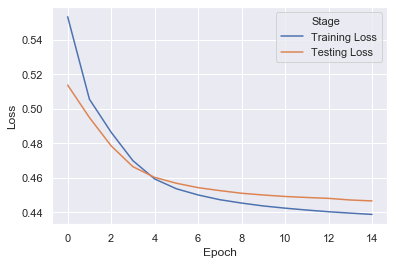

In [473]:
# vizualize train and test error across iterations
sns.set(style="darkgrid")

sns.lineplot(x="Epoch", y="Loss",
             hue="Stage",
             data=lossData)

## Decision tree

### MNIST dataset

In [419]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset))
valloader = torch.utils.data.DataLoader(valset, batch_size=len(valset))

In [420]:
X_train_MNIST = trainset.data.numpy()
X_test_MNIST = valset.data.numpy()

In [421]:
y_train_MNIST = trainset.targets.numpy()
y_test_MNIST = valset.targets.numpy()

In [422]:
np.bincount(y_train_MNIST) + np.bincount(y_test_MNIST)

array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958])

In [423]:
print(X_train_MNIST[1])
print(y_train_MNIST[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [424]:
print(X_train_MNIST.shape)
print(y_train_MNIST.shape)

(60000, 28, 28)
(60000,)


In [425]:
X_train_MNIST_reshaped = X_train_MNIST.reshape((60000, 784))
X_test_MNIST_reshaped = X_test_MNIST.reshape((10000, 784))

In [426]:
X_train_MNIST_reshaped[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [427]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_MNIST_reshaped, y_train_MNIST)
preds = clf.predict(X_test_MNIST_reshaped)
print(accuracy_score(preds, y_test_MNIST))

0.8796


In [428]:
preds

array([7, 2, 1, ..., 4, 5, 6])

### Credit default dataset

In [429]:
np.bincount(y_train) + np.bincount(y_test)

array([23364,  6636])

In [478]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print(accuracy_score(preds, y_test))

0.729


In [479]:
probs = [row[1] for row in probs]
roc_auc_score(y_test, probs)

0.6197733232011409

## Boosting

### MNIST

In [431]:
gb_clf = GradientBoostingClassifier(
    verbose=1,
    max_features="auto",
    n_estimators=5,
    max_depth=5
)
gb_clf.fit(X_train_MNIST_reshaped, y_train_MNIST)
preds = gb_clf.predict(X_test_MNIST_reshaped)
print(accuracy_score(preds, y_test_MNIST))

      Iter       Train Loss   Remaining Time 
         1      105055.5361            3.64m
         2       88437.2765            2.72m
         3       76545.2172            1.82m
         4       67550.8656           54.47s
         5       60036.9598            0.00s
0.876


### Credit default

In [480]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
preds = gb_clf.predict(X_test)
probs = gb_clf.predict_proba(X_test)
print(accuracy_score(preds, y_test))

0.8176666666666667


In [481]:
probs = [row[1] for row in probs]
roc_auc_score(y_test, probs)

0.7783219400096328

## KNN

### MNIST

In [35]:
kNN = KNeighborsClassifier(
    n_neighbors=10
)
kNN.fit(X_train_MNIST_reshaped, y_train_MNIST)
preds = kNN.predict(X_test_MNIST_reshaped)
print(accuracy_score(preds, y_test_MNIST))

0.9665


### Credit default

In [483]:
kNN = KNeighborsClassifier(
    n_neighbors=5
)
kNN.fit(X_train, y_train)
preds = kNN.predict(X_test)
probs = kNN.predict_proba(X_test)
print(accuracy_score(preds, y_test))

0.7896666666666666


In [484]:
probs = kNN.predict_proba(X_test)
probs = [row[1] for row in probs]
roc_auc_score(y_test, probs)

0.7013389022641956